In [4]:
#%% packages
import torch
import seaborn as sns
import numpy as np

In [5]:

#%% create a tensor
x = torch.tensor(5.5)

# %% simple calculations
y = x + 10
print(y)

tensor(15.5000)


In [10]:
#%% create a tensor
x = torch.tensor(5.5, requires_grad=True)

# %% simple calculations
y = x + 10
print(y)
y.backward()
print(x.grad)

tensor(15.5000, grad_fn=<AddBackward0>)
tensor(1.)


In [14]:
#%% create a tensor
x = torch.tensor(1.0, requires_grad=True)

# %% simple calculations
y = (x-3)*(x-6)*(x-4)
print(y)
y.backward()
print(x.grad)

tensor(-30., grad_fn=<MulBackward0>)
tensor(31.)


In [16]:
# %% automatic gradient calculation
print(x.requires_grad)  # check if requires_grad is true, false if not directly specified

x.requires_grad_() # set requires grad to true, default True

True


tensor(1., requires_grad=True)

True
x_range [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
y_range [-72.0, -66.729, -61.71199999999999, -56.94300000000001, -52.416, -48.125, -44.064, -40.227, -36.608000000000004, -33.201, -30.0, -26.999000000000002, -24.191999999999997, -21.573, -19.135999999999992, -16.875, -14.783999999999999, -12.856999999999996, -11.088000000000001, -9.470999999999997, -8.0, -6.669, -5.471999999999998, -4.402999999999998, -3.4559999999999964, -2.625, -1.9039999999999995, -1.286999999999999, -0.7679999999999988, -0.3409999999999987, 0.0, 

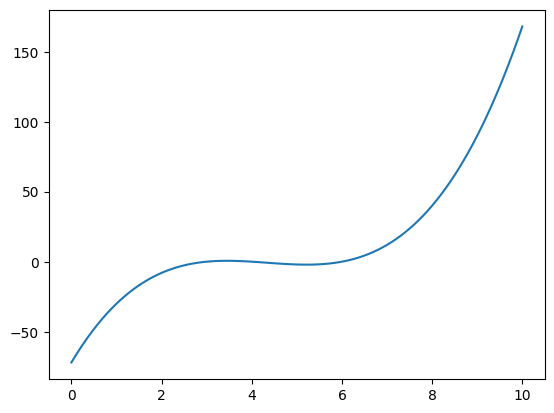

In [17]:
#%% or set the flag directly during creation
x = torch.tensor(2.0, requires_grad=True)
print(x.requires_grad)
#%% function for showing automatic gradient calculation
def y_function(val):
    return (val-3) * (val-6) * (val-4)

x_range = np.linspace(0, 10, 101)
print("x_range", x_range)

y_range = [y_function(i) for i in x_range]
print("y_range", y_range)
sns.lineplot(x = x_range, y = y_range)

# %% define y as function of x
y = (x-3) * (x-6) * (x-4)
print(y)
# %%

# %% x -> y
# create a tensor with gradients enabled
x = torch.tensor(1.0, requires_grad=True)
# create second tensor depending on first tensor
y = (x-3) * (x-6) * (x-4)
# calculate gradients
y.backward()
# show gradient of first tensor
print(x.grad)
# %%

In [29]:
# %% x -> y -> z
x = torch.tensor(1.0, requires_grad=True)
y = x**3
z = 5*y - 4

print("x", x)
print("y", y)
print("z", z)

# z = 5(x**3) - 4
# dz/dx = 5*3x**2

print(x.grad)  # should be None

# %%
z.backward()
print(x.grad)  # should be equal 5*3x**2 
print(y.grad)  # should be None
print(z.grad)  # should be None

x tensor(1., requires_grad=True)
y tensor(1., grad_fn=<PowBackward0>)
z tensor(1., grad_fn=<SubBackward0>)
None
tensor(15.)
None
None


/var/folders/qw/zz252tmd3r97k9hzmv_gwbv40000gn/T/ipykernel_46676/2692363599.py:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(y.grad)  # should be None
/var/folders/qw/zz252tmd3r97k9hzmv_gwbv40000gn/T/ipykernel_46676/2692363599.py:19: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the 

In [30]:
# %% more complex network
x11 = torch.tensor(2.0, requires_grad=True)
x21 = torch.tensor(3.0, requires_grad=True)
x12 = 5 * x11 - 3 * x21
x22 = 2 * x11**2 + 2 * x21
y = 4 * x12 + 3 * x22
y.backward()
print(x11.grad)
print(x21.grad)

tensor(44.)
tensor(-6.)
